# Проект: Сеть фитнес-центров «Культурист-датасаентист» 

1. Загрузка данных 
2. Проведем исследовательский анализ данных (EDA)
3. Построим модель прогнозирования оттока клиентов
  3.1 Логистическая регрессия
  3.2 Случайный лес
4. Сделаю кластеризацию пользователей
5. Вывод

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

## Загрузка данных

In [2]:
# Загрузим дадафрейм
df = pd.read_csv('/datasets/gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [3]:
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1326,1,1,1,1,1,12,1,30,341.768106,12.0,2,0.000000,0.000000,0
3482,0,1,0,0,1,1,0,27,104.740335,1.0,0,2.370923,1.381620,1
625,0,1,0,0,0,1,0,26,70.010144,1.0,9,3.171805,3.194608,0
3581,1,1,0,0,1,1,0,33,105.161186,1.0,1,0.528248,0.589343,0
447,1,1,0,0,1,12,0,29,53.833863,11.0,3,2.180725,2.335272,0
3230,0,1,1,1,1,12,1,31,268.097493,12.0,3,2.256586,2.303706,0
2417,1,1,0,0,1,6,1,30,203.405400,6.0,1,2.313525,2.325036,0
423,0,1,0,0,1,6,0,31,144.690532,5.0,5,1.669950,1.700592,0
283,1,0,0,0,1,1,0,30,300.329873,1.0,0,0.984062,0.909779,1
1262,1,1,1,0,1,1,0,27,60.013846,1.0,19,1.989381,1.915780,0


In [4]:
# просмотрю информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
# рассмотрю на столбцы
df.columns.tolist()

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month',
 'Churn']

In [6]:
# приведу к нижнему регистру 
df.columns = [i.lower() for i in df]

In [7]:
# проверю столбцы
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [8]:
#посмотрим пропуски
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [9]:
# посмотрю дубликаты
df.duplicated().sum()

0

In [10]:
# просмотрю сколько строк и колонок датафрейме
df.shape

(4000, 14)

# Вывод: 
пропусков дадафрайме нет, название столбцов привела в порядок, пропусков нет, дубликатов нет.
датафрейме 4000 строк и 14 колонок 

## Проведем исследовательский анализ данных (EDA)

In [11]:
# посмотрим на среднее и стандартное отклонение
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


в age видно что возраст мин 18 лет мак 41 год, а вот std 3,25 это скорей всего люди блиского возраста. 

In [12]:
# средние значения признаков в двух группах
df.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


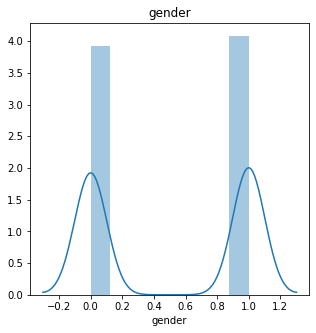

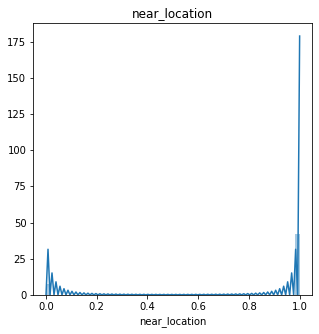

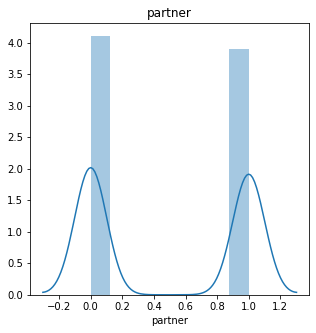

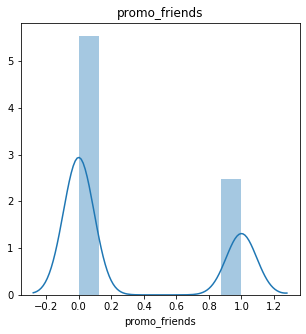

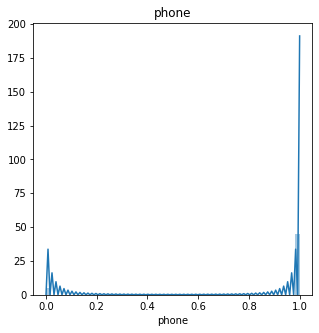

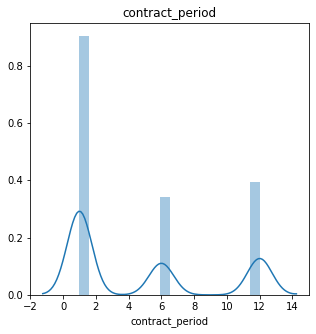

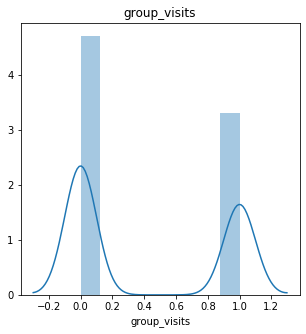

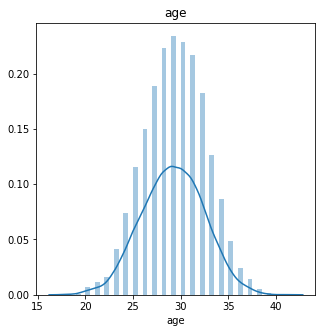

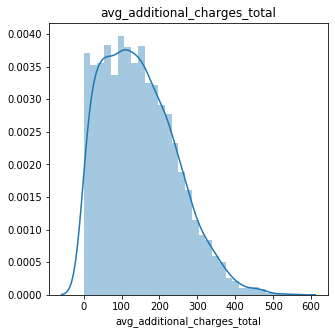

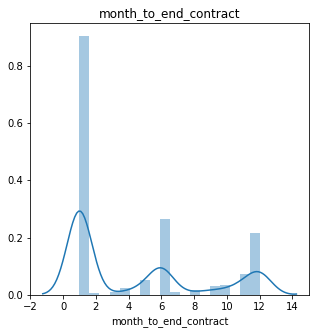

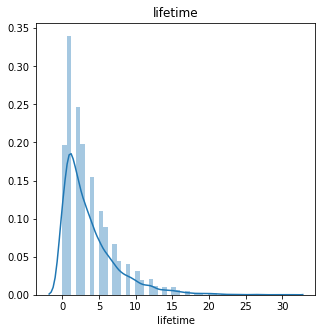

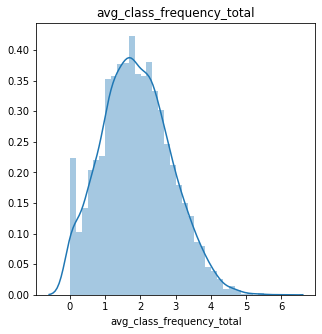

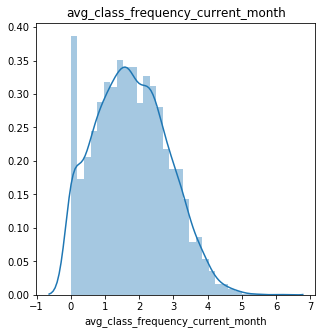

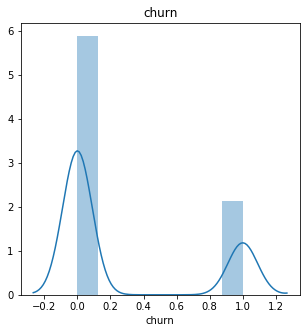

In [14]:
for column in df.columns:
    plt.figure(figsize=(5, 5))
    df.groupby('churn')[column]
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

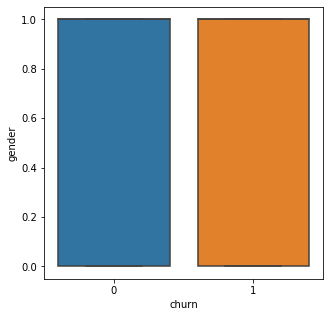

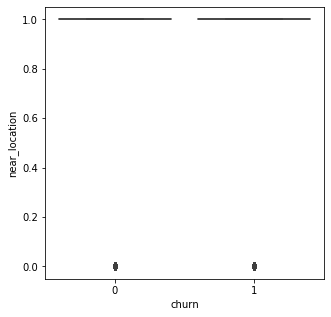

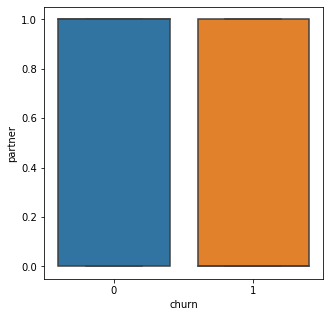

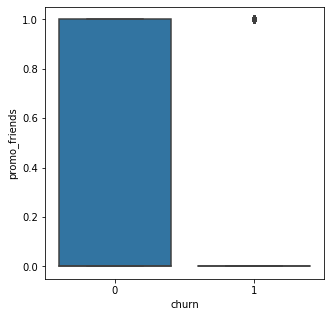

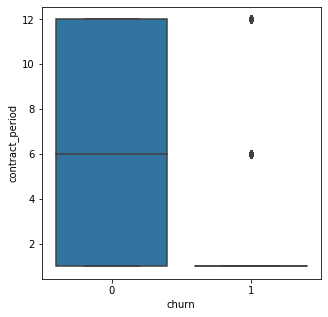

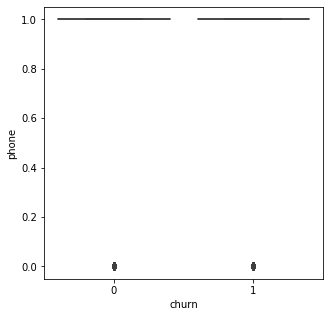

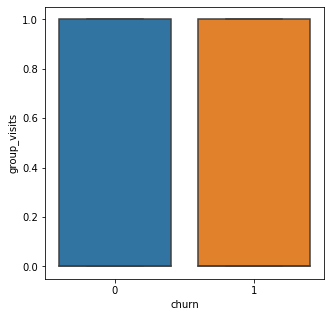

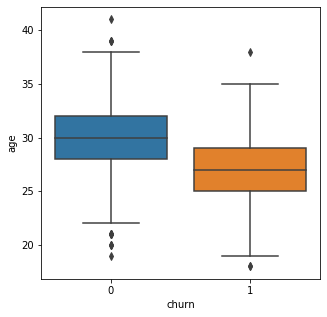

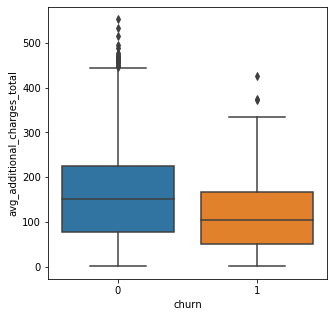

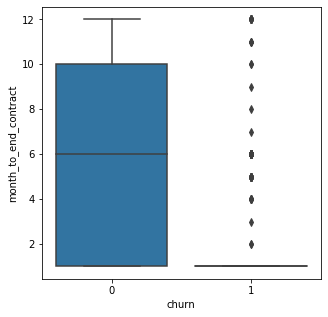

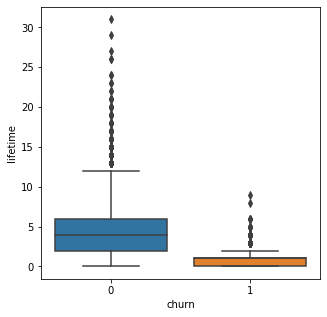

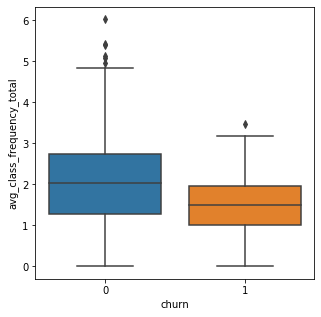

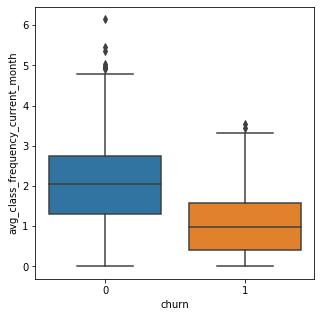

In [15]:
# построю boxplot
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'phone', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.show()

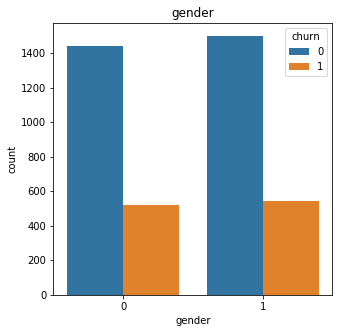

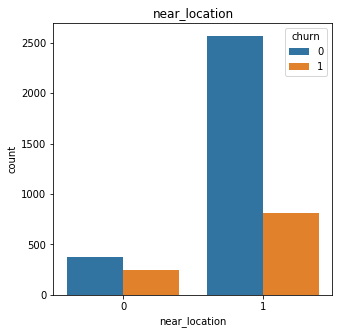

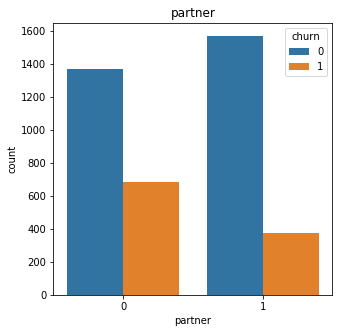

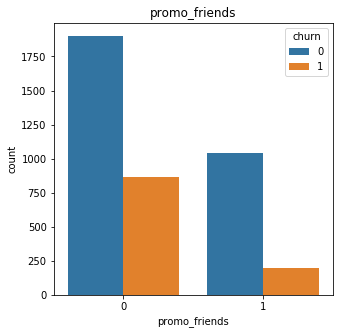

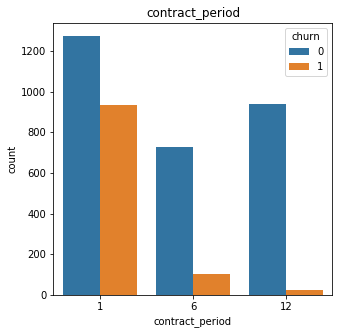

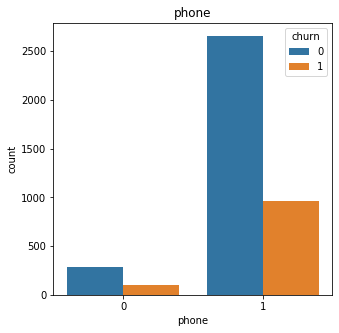

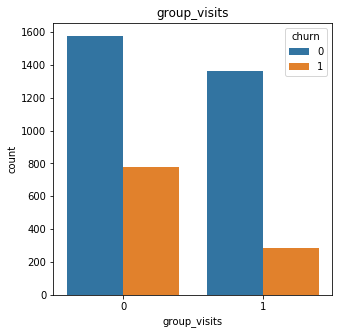

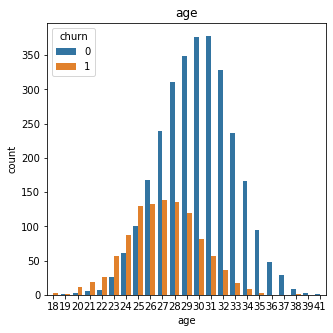

In [ ]:
# распределения
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'phone', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

In [ ]:
# матрица корреляции
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

Есть мультиколлинеарные признаки:
contract_period - month_to_end_contract
avg_class_frequency_current_month - avg_class_frequency_total
Есть признаки с нулевой корреляцией с целевой переменной:
phone
gender

# 3. Построим модель прогнозирования оттока клиентов

Постройте модель бинарной классификации клиентов

# логистическая регрессия

In [ ]:
X = df.drop(columns = ['churn'])
y = df['churn']

In [ ]:
#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #ваш код здесь

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = m, random_state = n )

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [ ]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

# Случайный лес

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [ ]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

в Случайном лесе регрессия выглядит лучше.

#  4. Сделаю кластеризацию пользователей

In [ ]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

In [ ]:
# матрица расстояния
linked = linkage(df_sс, method = 'ward')

In [ ]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

In [ ]:
# Обучу модель кластеризации на основании алгоритма K-Means, число кластеров принять 5
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

In [ ]:
df.cluster.value_counts()

In [ ]:
# посчитаю долю оттока
df.groupby('cluster').mean().T

В среднем слабее оттекают кластеры 0 и 2.
Живо оттекают из номера 3, одинаково из 1 и 4.


In [ ]:
# Построю распределения признаков для кластеров
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'phone', 'group_visits', 'age','avg_additional_charges_total','month_to_end_contract','lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

'gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'phone', 'group_visits', 'age','avg_additional_charges_total','month_to_end_contract','lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'

In [ ]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'phone', 'group_visits', 'age','avg_additional_charges_total','month_to_end_contract','lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x ='cluster',y = column, data = df)
    plt.show()

# 5. Вывод

Признаки "хороших кластеров":
* возрастом — он больше
* 2 кластер выделяется длительностью абонемента
* оба кластера выделяются временем с момента первого обращения — ходят давно
* большими расходами на доп. услуги
* средняя частота посещений в неделю за предыдущий месяц у них тоже выже

* Для закупки трафика и привличения пользователей использовать лук-элайк аудитории из "хороших кластеров".
* Поддерживать и мотивировать "хорошие кластеры".
* Глубже сегментировать оттекающих, к каждому сегменту тестировать индивидуальные предложения.
* Выстроить предиктивную систему аналитики и действовать не после оттока, а до него.